In [97]:
import pandas as pd
import trafalgar as tg
import utils as ut
import matplotlib.pyplot as plt

In [2]:
file_name = 'ohlcv_5_13_2021.parquet'
ohlcv = pd.read_parquet(file_name)

In [3]:
ohlcv.head()

Attributes   Open                                                             \
Symbols        SQ  AVID   KIRK          FB       TSLA  CROX HVBTF   NTP UROY   
Date                                                                           
2016-01-04  12.75  7.16  14.26  101.949997  46.144001  9.95  0.02  5.84  NaN   
2016-01-05  12.20  7.97  14.15  102.889999  45.271999  9.85  0.02  5.78  NaN   
2016-01-06  11.50  7.65  13.91  101.129997  44.000000  9.67  0.02  5.80  NaN   
2016-01-07  11.13  7.50  13.31  100.500000  42.838001  9.50  0.02  5.73  NaN   
2016-01-08  11.25  7.49  13.26   99.879997  43.571999  9.57  0.02  5.64  NaN   

Attributes         ...     Volume                                           
Symbols      SCHN  ...        PEP LMR GRAT ETMC WML NILI TOI BTCC HIVE NPI  
Date               ...                                                      
2016-01-04  14.20  ...  6689000.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-05  14.18  ...  4893800.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-06  13.85  ...  5483400.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-07  13.53  ...  5440000.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2016-01-08  13.30  ...  4853500.0 NaN  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  

[5 rows x 855 columns]

In [4]:
ohlcv.tail()

Attributes        Open                                                \
Symbols             SQ       AVID       KIRK          FB        TSLA   
Date                                                                   
2021-05-07  240.089996  27.260000  31.559999  322.380005  665.799988   
2021-05-10  229.619995  29.309999  31.510000  314.350006  664.900024   
2021-05-11  205.889999  26.100000  28.780001  300.750000  599.239990   
2021-05-12  215.300003  26.799999  28.780001  301.130005  602.489990   
2021-05-13  208.199997  26.360001  27.410000  306.083008  601.544983   

Attributes                                                ...     Volume      \
Symbols           CROX HVBTF        NTP  UROY       SCHN  ...        PEP LMR   
Date                                                      ...                  
2021-05-07  105.800003  3.15  16.590000  3.59  55.820000  ...  4181000.0 NaN   
2021-05-10  108.500000  3.28  19.040001  3.55  56.500000  ...  5270600.0 NaN   
2021-05-11  101.709999  3.00  18.490000  3.36  53.520000  ...  5266100.0 NaN   
2021-05-12  101.139999  3.14  19.389999  3.33  56.330002  ...  5651700.0 NaN   
2021-05-13   98.980003  2.76  18.830000  3.13  53.240002  ...        NaN NaN   

Attributes                                       
Symbols    GRAT ETMC WML NILI TOI BTCC HIVE NPI  
Date                                             
2021-05-07  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-10  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-11  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-12  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  
2021-05-13  NaN  NaN NaN  NaN NaN  NaN  NaN NaN  

[5 rows x 855 columns]

### Optimize Portfolio
- Sortino
- Sharpe
- Calmar
- Profit
- Alpha
- Beta

In [5]:
close = ohlcv['Close']
close.shape

(1350, 171)

In [6]:
y = 1
td = 252

index = close.isnull().sum()[((~close.isnull()).sum() >= td*y)].index
close = close[index]
close = close.iloc[:-1]
close.shape

(1349, 150)

In [8]:
close.drop(['NOB', 'ONEW'], axis=1, inplace=True)

In [73]:
alg = ut.sortino
dates = ('2021-01-01', '2021-04-01')
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -50.671387117861265
            Iterations: 74
            Function evaluations: 10516
            Gradient evaluations: 70

sortino: 50.67139


,ticker,assigned
101,TMUS,0.266367
57,CNC,0.183197
73,FNKO,0.098514
123,NAKD,0.076292
116,INTT,0.071896
131,GME,0.069524
75,OCGN,0.059830
36,ORGO,0.053843
47,ESTE,0.038538
61,CIDM,0.027498


In [74]:
test_dates = ('2021-04-01', '2021-05-12')
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 2.4146784278577194
Sharpe: 1.0402792754282422


<AxesSubplot:xlabel='Date'>

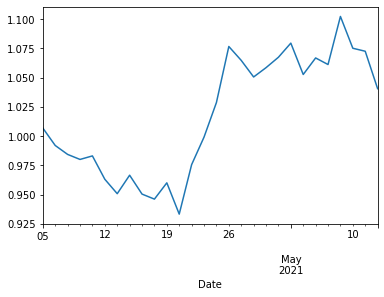

In [75]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [76]:
alg = ut.sharpe
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -14.717252757347971
            Iterations: 47
            Function evaluations: 7008
            Gradient evaluations: 47

sharpe: 14.71725


,ticker,assigned
146,PEP,0.211439
38,UAN,0.089925
62,CME,0.086975
89,CAR,0.079699
51,EPIX,0.079319
85,STKS,0.072262
57,CNC,0.070670
25,SPLP,0.069112
7,NTP,0.056168
99,FUTU,0.039967


In [77]:
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)
profit = -ut.profit(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 5.610361644141956
Sharpe: 3.9293638403403874


<AxesSubplot:xlabel='Date'>

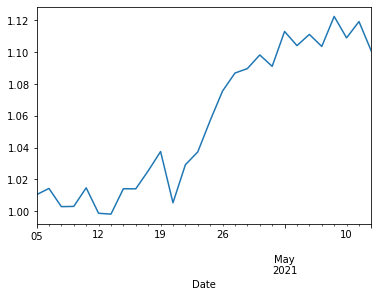

In [78]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [79]:
alg = ut.calmar
assigned, ratio = ut.optimize(alg, close, dates)
assigned

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -20.60818985845412
            Iterations: 77
            Function evaluations: 11157
            Gradient evaluations: 73

calmar: 20.60819


,ticker,assigned
57,CNC,0.191363
62,CME,0.151490
95,AEO,0.108625
38,UAN,0.088473
73,FNKO,0.071170
131,GME,0.057152
120,GOOG,0.052075
140,AMTX,0.039548
25,SPLP,0.037770
7,NTP,0.030488


In [80]:
stock_test = close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()

sortino = -ut.sortino(assigned.assigned.tolist(), stock_test)
sharpe = -ut.sharpe(assigned.assigned.tolist(), stock_test)

print(f'Sortino: {sortino}\nSharpe: {sharpe}')

Sortino: 3.872194799560376
Sharpe: 2.2604926074250358


<AxesSubplot:xlabel='Date'>

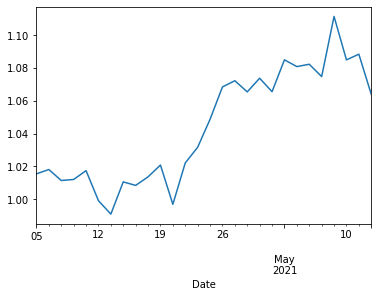

In [81]:
((close[assigned.ticker].loc[test_dates[0]:test_dates[1]].pct_change()[1:]*assigned.assigned.tolist()).sum(axis=1)+1).cumprod().plot()

In [15]:
alg = ut.profit
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.496130920329712
            Iterations: 4
            Function evaluations: 592
            Gradient evaluations: 4

profit: 4.49613


,ticker,assigned
6,HVBTF,1.0


In [16]:
alg = ut.alpha_f
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.016248925637095117
            Iterations: 22
            Function evaluations: 3256
            Gradient evaluations: 22

alpha_f: 0.016


,ticker,assigned
6,HVBTF,0.572826
75,OCGN,0.427174


In [17]:
alg = ut.beta_f
assigned, ratio = ut.optimize(alg, close, ('2020-01-01', '2021-01-01'))
assigned

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.4036938059023742
            Iterations: 4
            Function evaluations: 592
            Gradient evaluations: 4

beta_f: 2.404


,ticker,assigned
29,GDEN,1.0


### Short Selling

In [82]:
periods = [4 ,5, 10, 20, 50, 100]
mov_avg = ut.moving_average(close, 'TSLA', periods)

In [86]:
def bollinger(df: pd.DataFrame, ticker:str, n:int, stds:float) -> pd.DataFrame:
    """
    """
    temp = df[[ticker]].copy()
    temp[f'ma_{n}'] = temp[ticker].rolling(n).mean()
    temp[f'std_{n}'] = temp[ticker].rolling(n).std()
    temp[f'bb_lo_{n}'] = temp[f'ma_{n}'] - stds * temp[f'std_{n}']
    temp[f'bb_hi_{n}'] = temp[f'ma_{n}'] + stds * temp[f'std_{n}']
    temp.drop(f'std_{n}', axis=1, inplace=True)
    return temp

In [108]:
tsla = bollinger(close, 'TSLA', 20, 2)

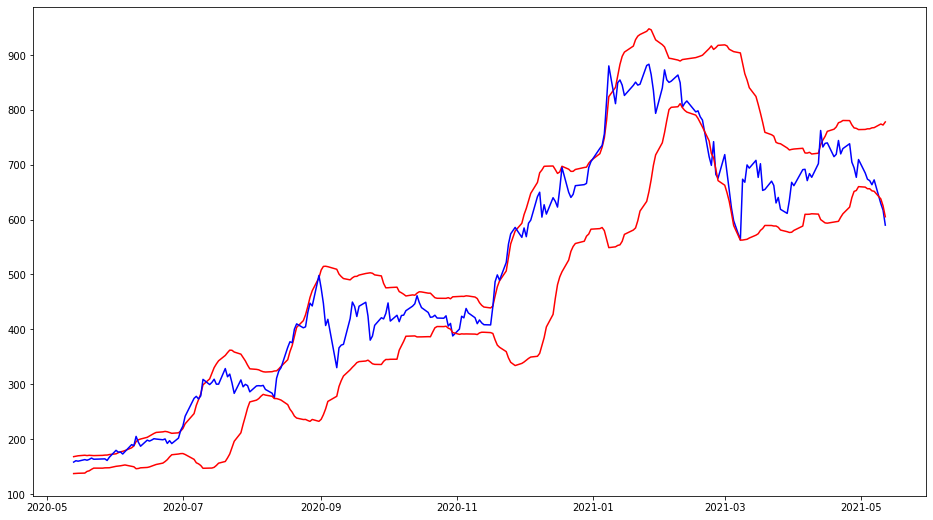

In [109]:
plt.figure(figsize=(16, 9))
plt.plot(tsla['bb_hi_20'].tail(252), color='r')
plt.plot(tsla['TSLA'].tail(252), color='b')
plt.plot(tsla['bb_lo_20'].tail(252), color='r')
plt.show()